In [15]:
#get to right filepath
import os
os.chdir('..')
#import functions
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

#register a cell object, generic field to set total environmental space
spatial_domain = ObjectCreator(
    type='SpatialDomain',
    inherits_from='',
    contained_objects=['ObjectSpace','ChemicalField']
    #information: total simulation space encompassing any contained fields
)
#register an object, chemical field
chemical_field = ObjectCreator(
    type='ChemicalField',
    inherits_from='Field',  # non-volume-excluding and continuous
    contained_objects=['Chemical']
    #information: solver information, mesh information
)
#register an object, chemical field
object_space = ObjectCreator(
    type='ObjectSpace',
    # inherits_from='',
    contained_objects=['Material']
    #information: solver information, mesh information
)
#register an object, cell type
cell_pop = ObjectCreator(
    type='CellPopulation',
    inherits_from='Cell',
    contained_objects=['Cell']
    #information: participating processes - process specific properties (though this could be contained within the processes themselves)
)

#register a cell object, chemical species
Chem = ObjectCreator(
    type='Chemical',
    inherits_from='ChemicalField',
    contained_objects=['']
    #information: participating processes, diffusion rate, reaction information (process?), boundary conditions
)
# register a process, contact/adhesion force
new_process = ProcessCreator(
    type='ContactForce',
    participating_objects=['CellField', 'CellPopulation'],
    #information: parameter values per cell type?, process function?
)
# register a process, chemotaxis
new_process1 = ProcessCreator(
    type='Chemotaxis',
    participating_objects=['Chemical', 'CellPopulation'],
    #information: parameter values per cell type?, process function?
)
cell_pop.validate()
cell_pop.register(overwrite=True)
cell_pop.save(filename='cell_population.json')
Chem.validate()
Chem.register(overwrite=True)
Chem.save(filename='chemicals.json')
spatial_domain.validate()
spatial_domain.register(overwrite=True)
spatial_domain.save(filename='spatial_domain.json')
chemical_field.validate()
chemical_field.register(overwrite=True)
chemical_field.save(filename='chemical_field.json')
object_space.validate()
object_space.register(overwrite=True)
object_space.save(filename='object_space.json')
new_process.validate()
new_process.register(overwrite=True)
new_process.save(filename='collision_process.json')
new_process1.validate()
new_process1.register(overwrite=True)
new_process1.save(filename='chemotaxis_process.json')

Schema saved to schema/object/cell_population.json
Schema saved to schema/object/chemicals.json
Schema saved to schema/object/field_base.json
Schema saved to schema/object/chemical_field.json
Schema saved to schema/object/object_space.json
Schema saved to schema/process/collision_process.json
Schema saved to schema/process/chemotaxis_process.json


In [16]:
cell_sorting = ModelBuilder(model_name='cell_sorting')
#cell_sorting.add_object(name='CPM_cell', object_type='CellPopulation')
#cell_sorting.add_object(name='CBM_cell', object_type='CellPopulation')
#cell_sorting.add_object(name='vertex_cell', object_type='CellPopulation')
cell_sorting.add_object(name='light', object_type='CellPopulation')
cell_sorting.add_object(name='dark', object_type='CellPopulation')
cell_sorting.add_object(name='environment', object_type='Field', contained_objects=["Objenvironment","Diffusive Field"])
cell_sorting.add_object(name='Objenvironment', object_type='CellField', contained_objects=["dark", "light"])
cell_sorting.add_object(name='Diffusive Field', object_type='ChemicalField', contained_objects=["quorum"])
cell_sorting.add_object(name='quorum', object_type='Chemical')
#cell_sorting.add_object(name='external_material', object_type='Material')
cell_sorting.add_process(name='repulsion', process_type='VolumeExclusion',
                    participating_objects=["dark", "light"])
cell_sorting.add_process(name='adhesion', process_type='ContactForce', participating_objects=["dark", "light"])
cell_sorting.add_process(name='Chemotaxis', process_type='Chemotaxis', participating_objects=["dark", "light", "quorum"])
cell_sorting.add_process(name='forcing function', process_type='MotileForce', participating_objects=["dark", "light"])
#Contact force function: f=k*(r1-r2) - put actual function in https://github.com/OpenVT/playground/blob/main/PhysiCell/physicell_mech_potential.ipynb
#dark,dark: k=1
#dark,light: k=0
#light,dark: k=0
#light,light: k=1

In [17]:
cell_sorting.validate()

In [18]:
cell_sorting.save(filename='cell_sorting.json')

Model saved to models/cell_sorting.json


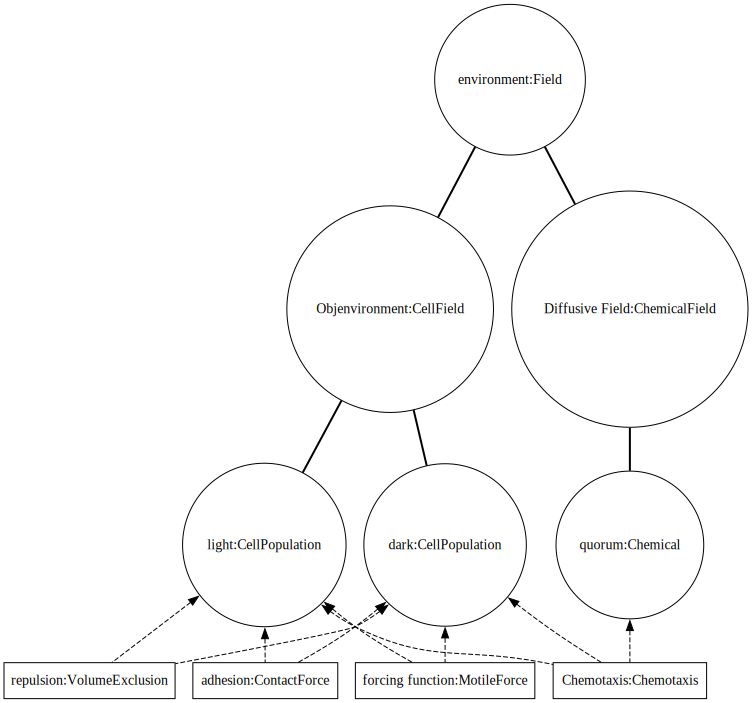

In [19]:
cell_sorting.graph()

In [20]:
cell_sorting

ModelBuilder({ 'id': 'model_000035',
  'name': 'cell_sorting',
  'objects': { 'Diffusive Field': { 'attributes': {},
                                    'boundary_conditions': {},
                                    'contained_objects': ['quorum'],
                                    'type': 'ChemicalField'},
               'Objenvironment': { 'attributes': {},
                                   'boundary_conditions': {},
                                   'contained_objects': ['dark', 'light'],
                                   'type': 'CellField'},
               'dark': { 'attributes': {},
                         'boundary_conditions': {},
                         'contained_objects': [],
                         'type': 'CellPopulation'},
               'environment': { 'attributes': {},
                                'boundary_conditions': {},
                                'contained_objects': [ 'Objenvironment',
                                                       'Diffusi